In [2]:
import numpy as np
from scipy.stats import scoreatpercentile
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pylab as plt
import seaborn as sns
from scipy.stats.stats import pearsonr

In [13]:
# datset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test])
data['LeadStatus'] = data['LeadStatus'].replace({"Passed":0, "Flagged":1, "Assign to CS":1})
data = data.drop(data[data['Country'] == 'ERROR'].index)

X = data.values[:, 8:38]             # ALL data
Pos = data.values[:, 8:15]           # POSITIVE symptoms item scores
Neg = data.values[:, 15:22]          # NEGATIVE symptoms item scores
Gen = data.values[:, 22:38]          # GENERAL symptoms item scores


In [5]:
data.head()

,Study,Country,PatientID,SiteID,RaterID,AssessmentiD,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10233,20029,30018,101771,Control,0,6,5,...,5,1,3,3,1,1,4,2,92,Passed
1,A,USA,10233,20029,30018,102243,Control,4,5,5,...,6,1,2,3,4,1,3,2,88,Passed
2,A,USA,10233,20029,30018,101978,Control,11,4,4,...,6,1,3,3,1,1,3,2,82,Passed
3,A,USA,10233,20029,30018,100076,Control,16,4,3,...,5,1,1,3,1,1,3,1,72,Passed
4,A,USA,10233,20029,30018,101258,Control,32,6,5,...,6,2,4,4,2,1,4,3,91,Flagged


In [8]:
#### ITEMS NAME ALL ###
items = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3',\
        'G4', 'G5', 'G6','G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', "G16"]
# POS
P_items = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7']
# NEG
N_items = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7']
# GEN
G_items = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
           'G11', 'G12', 'G13', 'G14', 'G15', "G16"]

pos-neg (0.44449732215582793, 0.0)
pos-gen (0.7879269787399235, 0.0)
gen-neg (0.6331851154313002, 0.0)


<Figure size 1440x1440 with 0 Axes>

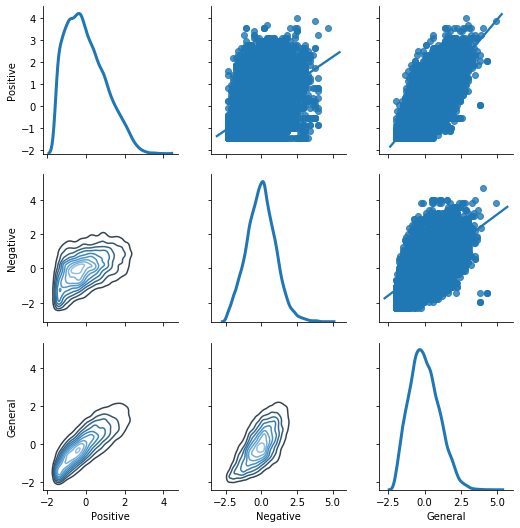

In [25]:
################################################################################
## Averaging (np.mean) per positive, negative and general symptom item scores ##
################################################################################

# STANDARDIZE THE DATA
Xpng = np.array(
        [np.mean(Pos, axis=1),
         np.mean(Neg, axis=1),
         np.mean(Gen, axis=1)]
        )
ss_X = StandardScaler()
Xpng2 = ss_X.fit_transform(Xpng.T)

# plot it
items = ['Positive', 'Negative', 'General']
df = pd.DataFrame(data=Xpng2, columns=items)
# sns.pairplot(df, diag_kind="kde", kind="Reg")
# sns.pairplot(df, diag_kind="kde", kind="reg")
# sns.pairplot(df)
# plt.savefig("paiplot_PNG_reg")
# plt.show()


# pearsonr returns Pearson corr + 2 tailed pvalues
print ("pos-neg", pearsonr(df["Positive"], df["Negative"]))
print ("pos-gen", pearsonr(df["Positive"], df["General"]))
print ("gen-neg", pearsonr(df["General"], df["Negative"]))



# sns pair grid
plt.figure(figsize=(20,20))
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig("plots/PairGrid_Stand_Kde.png")
plt.show()  